In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as p
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Read-in the data 

In [6]:
# import Olympic data sets
data=pd.read_csv('athlete_events.csv')
region=pd.read_csv('noc_regions.csv')

In [7]:
# merge data and region data set
data=pd.merge(data, region, left_on='NOC', right_on='NOC', how='inner')

In [8]:
data.head()

ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Middleweight   NaN  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman   NaN  China   NaN  
4     Swimming Women's 200 metres Freestyle   NaN  China   NaN

In [261]:
# examine the structure of the Olympic data frame
# identify missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   270767 non-null  object 
 15  region  270746 non-null  object 
 16  notes   270767 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [253]:
# how many attributes and how many records?
data.shape

(270767, 17)

In [352]:
# examine the number of unique values in each attribute
data.nunique()

Name      134566
Sex            2
Age          782
Height      2470
Weight      3562
Team        1179
NOC          229
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          4
region       205
notes         22
dtype: int64

## Data Preprocessing

### Impute missing data for numeric data including Year, Height, Weight, Age 

In [9]:
# build a list of columns that will be used for imputation, which are Year, Height, Weight, Age
# The column Year does not have any missing values, however we include it since 
# it might be helpful modeling the other three columns. The age, height, weight could change accross years
num_cols=data.select_dtypes(include='number').columns

In [301]:
# create IterativeImputer object in sklearn to impute and set its min_value and max_value parameters to be 
# the min and max of corresponding columns
ite_imp=IterativeImputer(min_value=data[num_cols].min(), max_value=data[num_cols].max())

In [302]:
# apply the imputer to fit and transform the columns to an imputed NumPy array
# assign the imputed array back to the original DataFrame's columns
data[num_cols]=ite_imp.fit_transform(data[num_cols])

In [ ]:
# fill missing in the column Medal with string of 'NA'
data['Medal']=data['Medal'].replace(np.nan, 'NA', regex=True)

In [245]:
# double check if all columns are imputed
data[num_cols].isna().sum()

ID            0
Age        9462
Height    60083
Weight    62785
Year          0
dtype: int64

In [259]:
data['Medal'].value_counts()

NA        230993
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64

In [257]:
# fill missing notes with 'NA' for column 
data['notes']=data['notes'].replace(np.nan, 'NA', regex=True)

In [439]:
data['notes'].value_counts()

NA                             265728
Yugoslavia                       2583
Hong Kong                         685
Trinidad and Tobago               375
Serbia and Montenegro             321
Virgin Islands                    294
Bohemia                           153
Antigua and Barbuda               133
United Arab Republic              123
Individual Olympic Athletes        94
Australasia                        86
Netherlands Antilles               79
Turks and Caicos Islands           42
West Indies Federation             20
Refugee Olympic Team               12
North Yemen                        11
Crete                              11
Tuvalu                              7
South Yemen                         5
North Borneo                        2
Unknown                             2
Newfoundland                        1
Name: notes, dtype: int64

In [ ]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age        9462
Height    60083
Weight    62785
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region       21
notes         0
dtype: int64

In [11]:
# We still have missing values in the column region
# data[data.isna()['region']]

In [17]:
# we can drop ID column since it is not a meaningful attribute
data=data.drop(columns='ID')

## Exploring Data Analysis

### Age and Sport

In [18]:
# The distribution of numerical columns
data.describe().T

count         mean        std     min     25%     50%     75%  \
Age     261305.0    25.559783   6.392501    10.0    21.0    24.0    28.0   
Height  210684.0   175.344250  10.519556   127.0   168.0   175.0   183.0   
Weight  207982.0    70.709523  14.350094    25.0    60.0    70.0    79.0   
Year    270767.0  1978.362297  29.884637  1896.0  1960.0  1988.0  2002.0   

           max  
Age       97.0  
Height   226.0  
Weight   214.0  
Year    2016.0

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

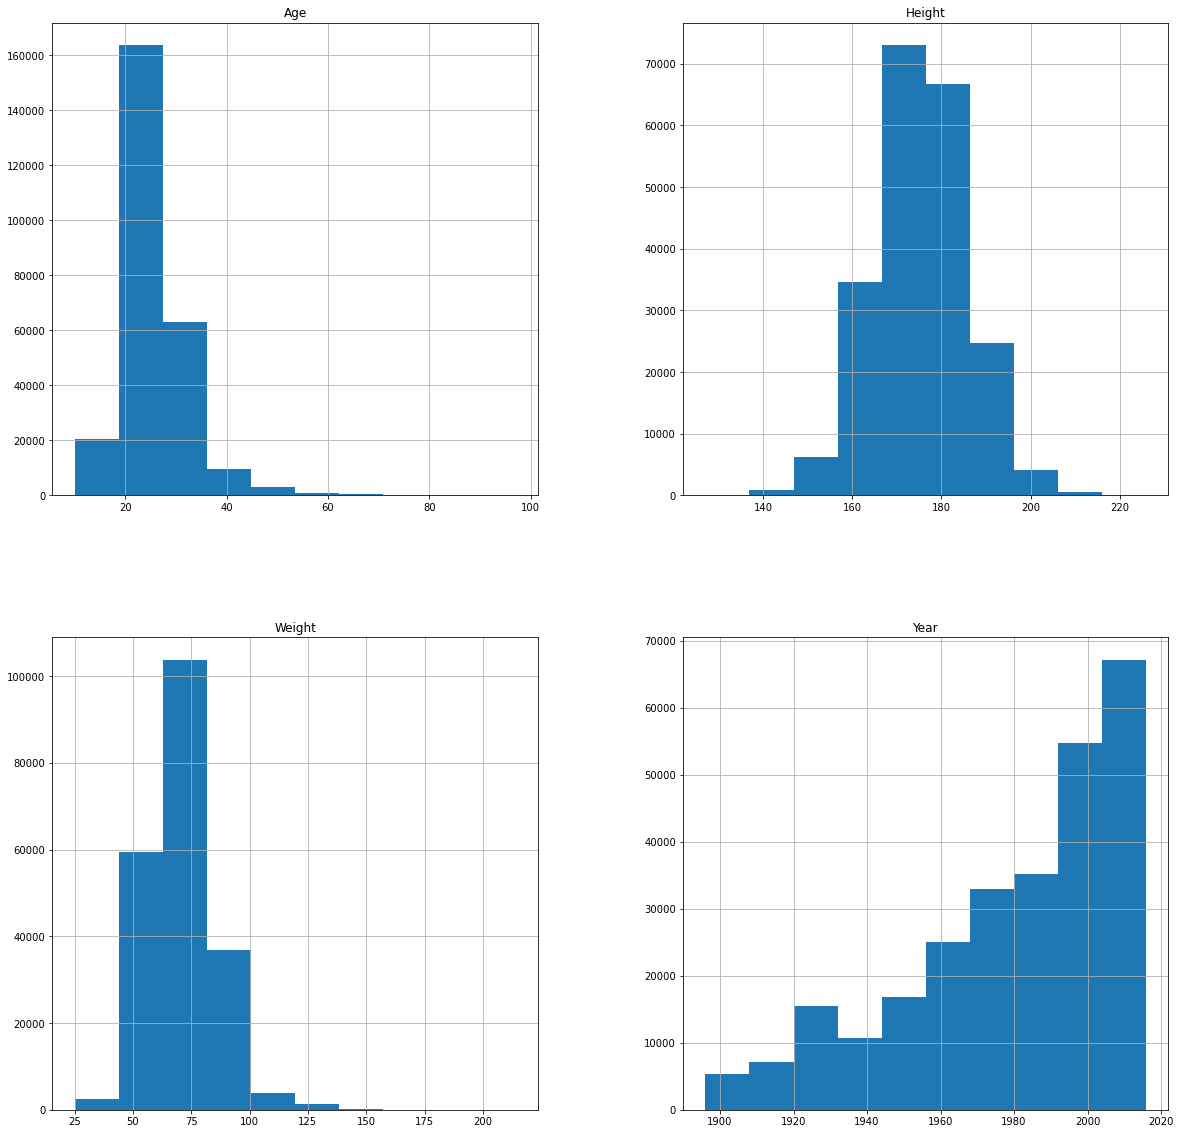

In [19]:
# plot the histograms of the numerical columns
data.hist(figsize=(20,20))

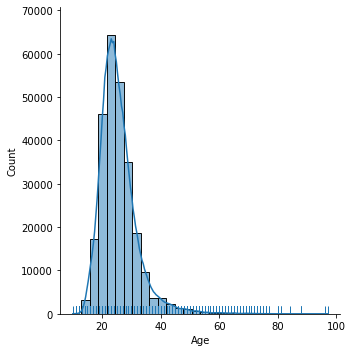

In [28]:
# adjusting the bins parameter of Age histogram to 20 with a rug plot using Seaborn
sns.displot(data=data, x='Age', rug=True, kde=True, bins=30)

In [53]:
# the distribution of athlete's Age
df = px.data.tips()
fig = px.box(data, y="Age")
fig.show()

In [54]:
# quantitle for the column Age
data.describe()['Age']

count    261305.000000
mean         25.559783
std           6.392501
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [70]:
# look at the sports for athletes of really young age
(data[['Age', 'Sport']][data['Age'] <= 10]).value_counts()

Age   Sport     
10.0  Gymnastics    1
dtype: int64

In [60]:
# look at the sportw for older age
(data[['Age', 'Sport']][data['Age'] >= 38]).value_counts()

Age   Sport           
39.0  Shooting            382
38.0  Shooting            341
40.0  Shooting            312
41.0  Shooting            303
43.0  Shooting            266
                         ... 
44.0  Baseball              1
54.0  Curling               1
      Bobsleigh             1
49.0  Skeleton              1
97.0  Art Competitions      1
Length: 524, dtype: int64

/Users/ellypham/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



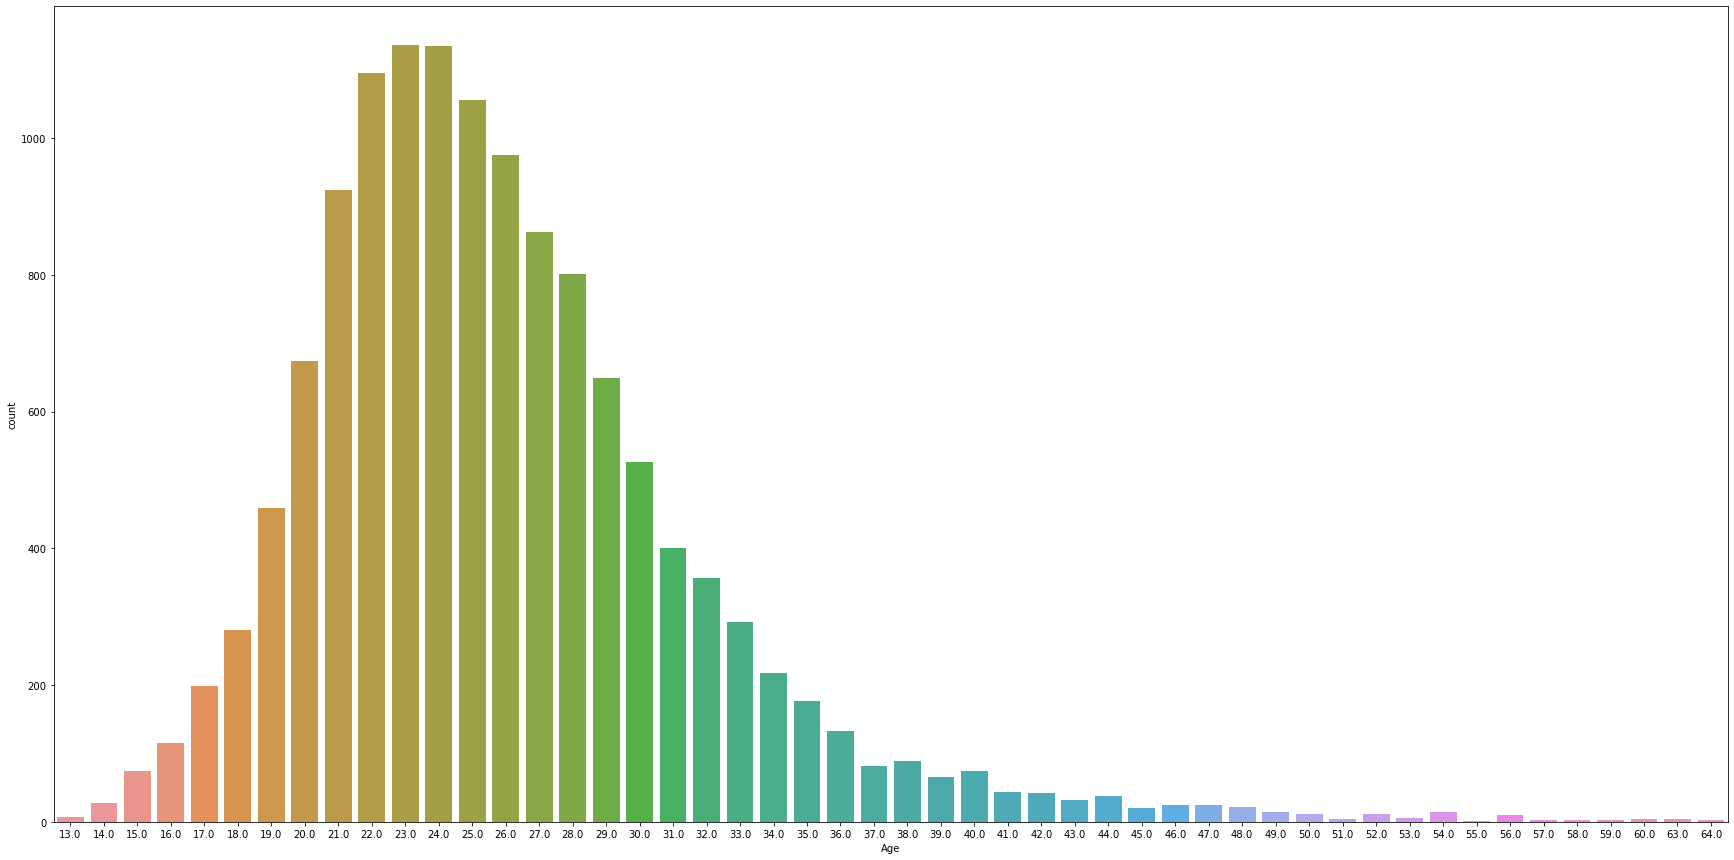

In [57]:
# Look further to see distribution of ages in Gold Medal
age_gold_medal= data['Age'] [data['Medal']=='Gold'].round(1)
plt.figure(figsize=(30, 15))
plt.tight_layout()
sns.countplot(age_gold_medal)
plt.show()

In [73]:
# Summary of non-numerical columns
data.describe(exclude='number').T

count  unique                      top    freq
Name    270767  134566     Robert Tait McKenzie      58
Sex     270767       2                        M  196374
Team    270767    1179            United States   17847
NOC     270767     229                      USA   18853
Games   270767      51              2000 Summer   13798
Season  270767       2                   Summer  222203
City    270767      42                   London   22389
Sport   270767      66                Athletics   38596
Event   270767     765  Football Men's Football    5733
Medal    39774       3                     Gold   13371
region  270746     205                      USA   18853
notes     5039      21               Yugoslavia    2583

### Sport and Year

In [74]:
# First record for each Olympic Sport
data.sort_values('Year').groupby(by='Sport').first()

Name Sex   Age  Height  Weight  \
Sport                                                                     
Aeronautics                 Hermann Schreiber   M  26.0     NaN     NaN   
Alpine Skiing           Christopher S. Hudson   M  35.0   165.0    74.0   
Alpinism            Theodore Howard Somervell   M  33.0     NaN     NaN   
Archery                  Frdric Adolphe Petit   M  43.0   169.0    84.0   
Art Competitions         Robert Tait McKenzie   M  44.0   170.0    81.0   
...                                       ...  ..   ...     ...     ...   
Tug-Of-War            Gustaf Fredrik Sderstrm   M  34.0   187.0   100.0   
Volleyball        Yuriy Mykhailovych Poiarkov   M  27.0   186.0    82.0   
Water Polo                        J. Bertrand   M  20.0   185.0    95.0   
Weightlifting              Momcsill Tapavicza   M  23.0   159.0    70.0   
Wrestling                     Georgios Tsitas   M  23.0   159.0    70.0   

                               Team  NOC        Games  Year  Season  \
Sport                                                                 
Aeronautics             Switzerland  SUI  1936 Summer  1936  Summer   
Alpine Skiing         Great Britain  GBR  1936 Winter  1936  Winter   
Alpinism              Great Britain  GBR  1924 Winter  1924  Winter   
Archery                      France  FRA  1900 Summer  1900  Summer   
Art Competitions             Canada  CAN  1912 Summer  1912  Summer   
...                             ...  ...          ...   ...     ...   
Tug-Of-War           Denmark/Sweden  SWE  1900 Summer  1900  Summer   
Volleyball             Soviet Union  URS  1964 Summer  1964  Summer   
Water Polo        Tritons Lillois-2  FRA  1900 Summer  1900  Summer   
Weightlifting               Hungary  HUN  1896 Summer  1896  Summer   
Wrestling                    Greece  GRE  1896 Summer  1896  Summer   

                                    City  \
Sport                                      
Aeronautics                       Berlin   
Alpine Skiing     Garmisch-Partenkirchen   
Alpinism                        Chamonix   
Archery                            Paris   
Art Competitions               Stockholm   
...                                  ...   
Tug-Of-War                         Paris   
Volleyball                         Tokyo   
Water Polo                         Paris   
Weightlifting                     Athina   
Wrestling                         Athina   

                                                         Event   Medal  \
Sport                                                                    
Aeronautics                      Aeronautics Mixed Aeronautics    Gold   
Alpine Skiing                     Alpine Skiing Men's Combined  Bronze   
Alpinism                               Alpinism Mixed Alpinism    Gold   
Archery                Archery Men's Au Cordon Dore, 33 metres  Bronze   
Art Competitions            Art Competitions Mixed Sculpturing    Gold   
...                                                        ...     ...   
Tug-Of-War                         Tug-Of-War Men's Tug-Of-War    Gold   
Volleyball                         Volleyball Men's Volleyball    Gold   
Water Polo                         Water Polo Men's Water Polo  Bronze   
Weightlifting         Weightlifting Men's Unlimited, Two Hands  Bronze   
Wrestling         Wrestling Men's Unlimited Class, Greco-Roman  Silver   

                       region                notes  
Sport                                               
Aeronautics       Switzerland                 None  
Alpine Skiing              UK           Yugoslavia  
Alpinism                   UK                 None  
Archery                France           Yugoslavia  
Art Competitions       Canada              Unknown  
...                       ...                  ...  
Tug-Of-War             Sweden                 None  
Volleyball             Russia           Yugoslavia  
Water Polo             France           Yugoslavia  
Weightlifting         

### The average Age, Height, Weight of female versus male Olympic athletes

In [310]:
data[['Age', 'Height', 'Weight', 'Sex']].groupby(by='Sex').mean().round(2)

Age  Height  Weight
Sex                       
F    23.75  168.48   60.97
M    26.30  177.86   74.74

### The minimum, average, maximum Age, Height, Weight of athletes in different year

In [116]:
data[['Age', 'Height', 'Weight', 'Sex']].groupby(by='Sex').agg(['min', 'max', 'mean']).T

Sex                   F           M
Age    min    11.000000   10.000000
       max    74.000000   97.000000
       mean   23.748465   26.303285
Height min   127.000000  127.000000
       max   213.000000  226.000000
       mean  168.525019  177.671188
Weight min    25.000000   28.000000
       max   167.000000  214.000000
       mean   61.012815   74.537568

### The total number of medals received by each gender Male and Female

In [165]:
data.groupby('Sex')[['Sex', 'Medal']].count()

Sex   Medal
Sex                
F     74522   74522
M    196594  196594

### The  minimum, average, median, maximum Age of athletes for different Season and Sex combinations

In [141]:
pd.pivot_table(data, index=['Season', 'Sex'], 
               values=['Age'],
               aggfunc=['min',  'max', 'mean', 'median'])

min   max       mean median
             Age   Age        Age    Age
Season Sex                              
Summer F    11.0  74.0  23.680664   23.0
       M    10.0  97.0  26.465580   25.0
Winter F    11.0  48.0  24.015741   24.0
       M    12.0  58.0  25.512731   25.0

### The average Age, Height, Weight of athletes, for different Medal, Season, Sex combinations

In [164]:
pd.pivot_table(data, index=['Medal', 'Season', 'Sex'], 
               values=['Age', 'Height', 'Weight'],
               aggfunc=['min',  'max', 'mean', 'median'])

min                 max                     mean  \
                    Age Height Weight   Age Height Weight        Age   
Medal  Season Sex                                                      
Bronze Summer F    12.0  136.0   28.0  69.0  205.0  141.0  24.632028   
              M    10.0  142.0   37.0  72.0  223.0  182.0  26.350804   
       Winter F    15.0  150.0   40.0  45.0  187.0   86.0  25.115578   
              M    14.0  157.0   53.5  48.0  201.0  123.0  26.386169   
Gold   Summer F    13.0  136.0   28.0  63.0  210.0  136.0  24.211986   
              M    13.0  140.0   42.0  64.0  223.0  170.0  26.488940   
       Winter F    13.0  147.0   36.0  43.0  184.0   95.0  25.202636   
              M    16.0  155.0   50.0  57.0  201.0  130.0  26.603701   
NA     Summer F    11.0  127.0   25.0  74.0  213.0  167.0  23.524566   
              M    11.0  127.0   28.0  97.0  226.0  214.0  26.433475   
       Winter F    11.0  137.0   32.0  48.0  194.0   96.0  23.854310   
              M    12.0  142.0   47.0  55.0  211.0  145.0  25.376253   
Silver Summer F    11.0  136.0   30.0  55.0  204.0  167.0  24.290199   
              M    13.0  145.0   47.0  73.0  223.0  154.0  26.666667   
       Winter F    15.0  145.0   41.0  46.0  187.0   86.0  25.240527   
              M    15.0  152.0   50.0  58.0  200.0  116.0  26.430566   

                                         median                
                       Height     Weight    Age Height Weight  
Medal  Season Sex                                              
Bronze Summer F    170.861847  63.476378   24.0  171.0   63.0  
              M    181.142241  78.886354   25.0  181.0   78.0  
       Winter F    166.953982  60.677477   25.0  167.0   60.0  
              M    179.678673  78.709223   26.0  180.0   78.0  
Gold   Summer F    171.381818  63.795652   24.0  172.0   63.0  
              M    181.680343  79.632568   25.0  182.0   78.0  
       Winter F    167.218371  61.764235   25.0  167.0   61.0  
              M    180.323636  79.354069   26.0  180.0   79.0  
NA     Summer F    167.598860  59.412097   23.0  168.0   59.0  
              M    178.468472  74.973865   25.0  178.0   73.0  
       Winter F    166.420642  59.520347   23.0  167.0   59.0  
              M    178.495761  76.009897   25.0  179.0   75.0  
Silver Summer F    171.074931  63.461338   24.0  171.0   63.0  
              M    181.333929  79.274533   25.0  182.0   78.0  
       Winter F    167.618307  61.681338   25.0  168.0   61.0  
              M    179.737705  78.564711   26.0  180.0   78.0

### Find out the association between Height and Weight of the atheletes

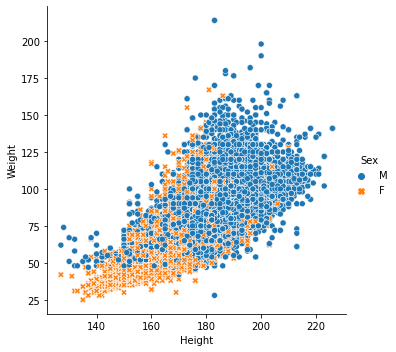

In [168]:
sns.relplot(data=data, x='Height', y='Weight', kind='scatter', hue='Sex', style='Sex')

### Is there a relationship between Age, Height, Weight

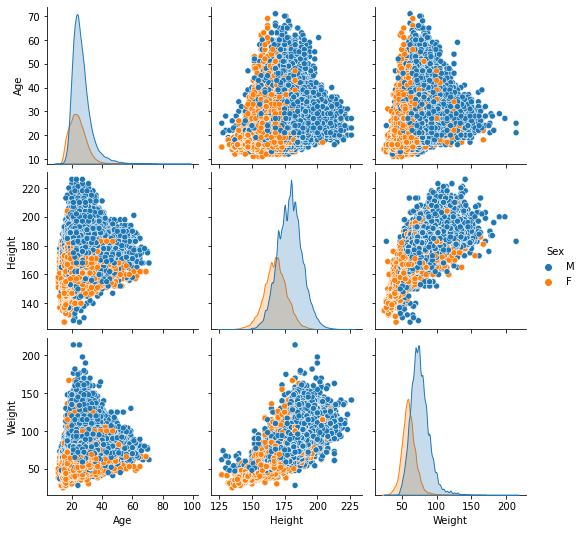

In [182]:
# correlation matrix grid
sns.pairplot(data=data[['Age', 'Height', 'Weight', 'Sex']], hue='Sex')

In [183]:
data[['Age', 'Height', 'Weight']].corr()

Age    Height    Weight
Age     1.000000  0.138246  0.212069
Height  0.138246  1.000000  0.796213
Weight  0.212069  0.796213  1.000000

<AxesSubplot:>

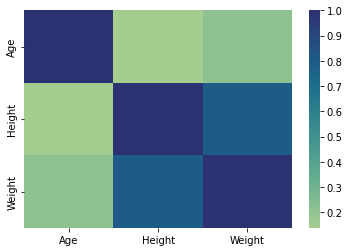

In [184]:
sns.heatmap(data[['Age', 'Height', 'Weight']].corr(), cmap='crest')

### Look for outliers in Age variable and check the distribution of Age by Sex and Season

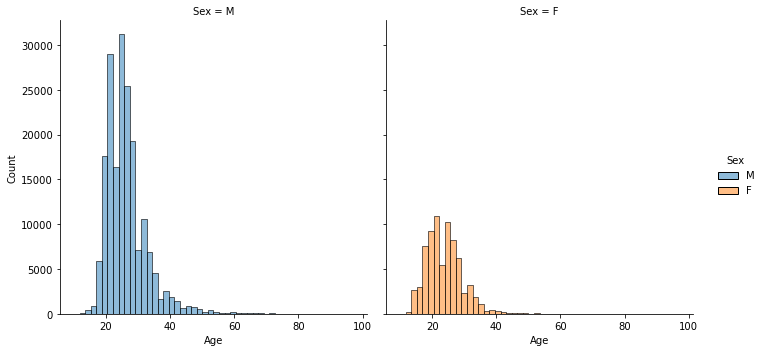

In [191]:
sns.displot(data=data, x='Age', kind='hist', bins=50, hue='Sex', col='Sex')

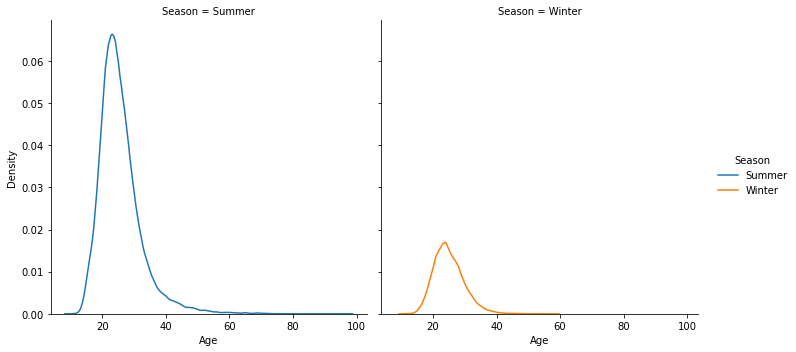

In [193]:
sns.displot(data=data, x='Age', kind='kde', hue='Season', col='Season')

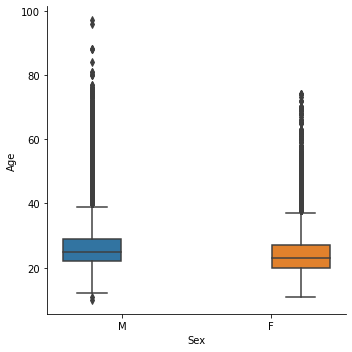

In [199]:
sns.catplot(data=data, x='Sex', y='Age', kind='box', hue='Sex')

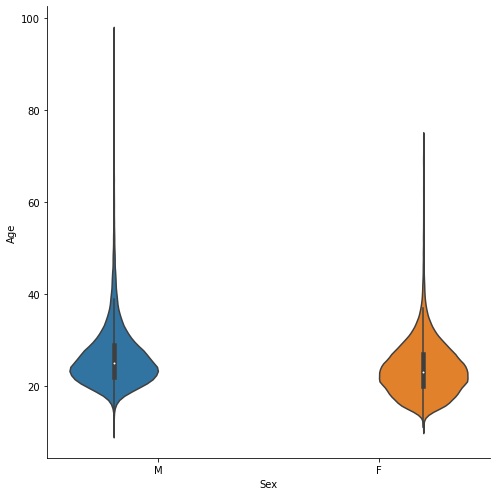

In [206]:
sns.catplot(data=data, x='Sex', y='Age', kind='violin', hue='Sex', height=7, aspect=1)

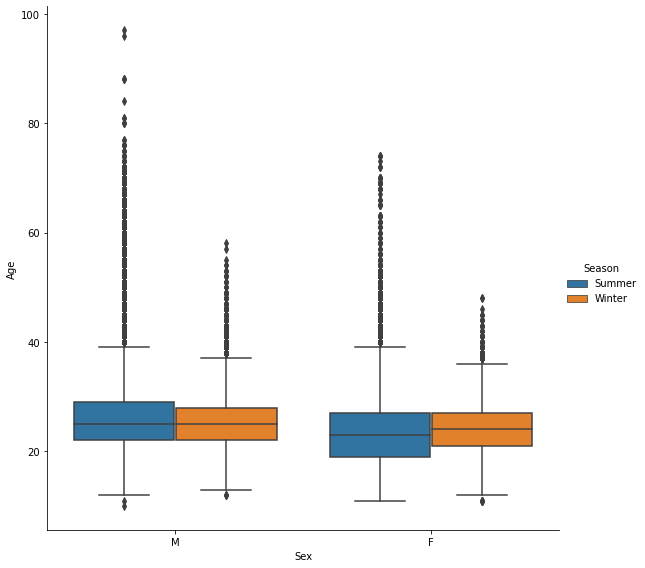

In [211]:
sns.catplot(data=data, x='Sex', y='Age', kind='box', hue='Season', height=8)